In [1]:
#Feed forward neural network - the input is 
#CIFAR10 is a database of 60000 32*32 pixel colour images in 10 classes. we can classify the with the model

import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [2]:
dataset_url = "http://files.fast.ai/data/cifar10.tgz"

download_url(dataset_url, '.')

In [3]:
#r:gz is for reading a file that has gzip compression
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path="./data")

In [4]:
data_dir = "./data/cifar10"
#training dataset
classes = (os.listdir(data_dir+"/train"))

len(os.listdir(data_dir + "/train" + "/airplane"))

root = data_dir + "/train"
dataset = ImageFolder(root, transform=ToTensor())

root_two = data_dir + "/test"
test_dataset = ImageFolder(root_two, transform=ToTensor())



classes

['ship',
 'cat',
 'automobile',
 'truck',
 'airplane',
 'horse',
 'frog',
 'bird',
 'deer',
 'dog']

In [5]:
print(dataset[1])

(tensor([[[0.4510, 0.4627, 0.4745,  ..., 0.5412, 0.5294, 0.5333],
         [0.4627, 0.4706, 0.4784,  ..., 0.5490, 0.5412, 0.5373],
         [0.4784, 0.4784, 0.4863,  ..., 0.5608, 0.5490, 0.5451],
         ...,
         [0.4235, 0.4157, 0.4118,  ..., 0.4078, 0.3333, 0.2431],
         [0.3961, 0.3882, 0.3882,  ..., 0.3804, 0.2824, 0.2314],
         [0.3765, 0.3804, 0.3882,  ..., 0.3294, 0.2667, 0.2431]],

        [[0.5412, 0.5529, 0.5647,  ..., 0.6235, 0.6157, 0.6157],
         [0.5529, 0.5608, 0.5686,  ..., 0.6314, 0.6235, 0.6235],
         [0.5686, 0.5686, 0.5765,  ..., 0.6431, 0.6314, 0.6314],
         ...,
         [0.3843, 0.3765, 0.3725,  ..., 0.3843, 0.3098, 0.2314],
         [0.3569, 0.3490, 0.3490,  ..., 0.3569, 0.2627, 0.2235],
         [0.3373, 0.3412, 0.3490,  ..., 0.3137, 0.2588, 0.2392]],

        [[0.7490, 0.7569, 0.7686,  ..., 0.7922, 0.7843, 0.7922],
         [0.7569, 0.7647, 0.7725,  ..., 0.8000, 0.7922, 0.8000],
         [0.7725, 0.7725, 0.7804,  ..., 0.8118, 0.8039, 0

In [6]:
img, label = dataset[15000]


In [7]:
print(img.size())

#the size is 3 tensors, 32 * 32

pltable = img.permute(1,2,0)

print(pltable.size())

torch.Size([3, 32, 32])
torch.Size([32, 32, 3])


In [8]:
print(dir(dataset).index('classes'))

33


In [9]:
classes = dataset.classes

In [10]:
#creating a training and validation dataset:
import numpy as np

def split_indices(dataset, split_rate, seed=99):
    sr = int(split_rate*len(dataset))
    #in order to recreate the same seed with future numpy arrays
    np.random.seed(seed)
    x = np.random.permutation(len(dataset))
    return x[sr:], x[:sr]

#create indices for sampling

val_pct = 0.2
seed = 42

train_indices, val_indices = split_indices(dataset, val_pct, seed)
print(train_indices)

#now that we have set the seed it will generate the same random numbers(to reproduce the same values. It will be different with the training ds)



[39087 30893 45278 ... 38158   860 15795]


In [11]:
from torch.utils.data import SubsetRandomSampler
from torch.utils.data import DataLoader


train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

#the loader before we put it on the GPU
train_loader = DataLoader(dataset, 100, sampler=train_sampler)
val_loader = DataLoader(dataset, 100, sampler=val_sampler)

for xb, yb in train_loader:
    print(yb)
    break


tensor([6, 4, 8, 2, 8, 9, 6, 2, 2, 6, 1, 1, 9, 7, 9, 6, 3, 6, 7, 5, 3, 9, 2, 7,
        8, 2, 3, 0, 3, 0, 2, 3, 4, 1, 5, 3, 3, 9, 0, 1, 1, 0, 9, 6, 8, 9, 5, 1,
        5, 6, 4, 5, 4, 5, 5, 9, 8, 1, 9, 4, 7, 4, 1, 1, 0, 2, 9, 4, 9, 2, 4, 3,
        4, 4, 9, 3, 7, 5, 0, 1, 4, 8, 4, 4, 6, 8, 2, 5, 4, 7, 1, 0, 0, 0, 9, 0,
        0, 3, 5, 0])


['airplane', 'frog', 'horse', 'frog', 'horse', 'automobile', 'deer', 'horse', 'dog', 'dog', 'cat', 'dog', 'automobile', 'bird', 'deer', 'deer', 'deer', 'automobile', 'truck', 'ship', 'bird', 'horse', 'airplane', 'cat', 'dog', 'automobile', 'horse', 'bird', 'ship', 'deer', 'deer', 'ship', 'bird', 'cat', 'bird', 'frog', 'horse', 'dog', 'airplane', 'cat', 'cat', 'horse', 'frog', 'dog', 'frog', 'bird', 'horse', 'ship', 'dog', 'horse', 'automobile', 'horse', 'airplane', 'deer', 'cat', 'horse', 'automobile', 'ship', 'dog', 'cat', 'truck', 'dog', 'automobile', 'truck', 'automobile', 'horse', 'ship', 'automobile', 'frog', 'cat', 'ship', 'airplane', 'frog', 'truck', 'ship', 'bird', 'horse', 'dog', 'frog', 'frog', 'frog', 'bird', 'automobile', 'cat', 'horse', 'deer', 'deer', 'dog', 'automobile', 'automobile', 'frog', 'truck', 'automobile', 'automobile', 'frog', 'frog', 'deer', 'truck', 'cat', 'frog']


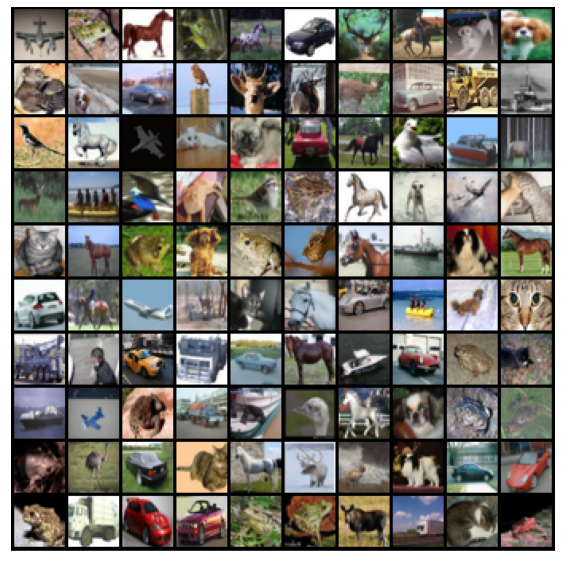

In [12]:
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
items = []
def show_batch(dl):
    for images, labels in dl:
        for i in labels:
            items.append(classes[i])
        fig, ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))

        print(items)
        break

show_batch(train_loader)

#it is mostly working in the sense that i can show the dataset


#2d convolutiuonal neural networks are simple - Kernel - matrix of weights - we will use the conv2d torch builtin for the cnn



In [13]:
import torch.nn as nn
import torch.nn.functional as F

#what conv2d does is "it applies a 2D convolution over an input signal
#composed of several input planes"

In [14]:
#Kernel of weights slides over the input, and gets an output which can fit into a matrix, then you would sum up the elements to 

#Pad the image, pixels around it -> 5x5 image returns a 5x5 output with padding

#Striding - move 2p at a time - 5x5 to 2x2 or 3x3


#Multiple channels -> (MNIST was 1 chanel) -> (Cifar10 has rgb channels) -> 1 matrix applied to red, greep and blue separately, 3 outputs, sum them together to get the output 
#matrix - Padding givers by 5x5 3 times, we add them together and we get the output matrix

#Fewer parameters - unlike fullyconnected neural networks - you have a weight that is applied to each item in the input field, we use a small set of parameters compared
#Fully connected layers have different weights for every element in the input, whereas this we can use a small set of parameters, much fewer parameters

#each output depends on a small number of input elements, whereas in full-connected outputs use all of the inputs for the output, because of the weights and the bias multiplied
#fewer gradients and matrix multiplications

#Making predictions are shared 


#if they are learning something at the etop of the image, they can apply the same learning at different parts of the image

#max pools - takes the maximum pixel from each of the sliding areas, to decrease the height and width of the output tensors from each conv layer

#after doing some padding or striding to slide around the image, you can reduce the size by doing max pooling

In [15]:
#ReLu is our activation function

#3 (RGB) channels
simple_model = nn.Sequential(nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1), nn.MaxPool2d(2,2))

In [16]:
for xb, yb in train_loader:
    print(xb.shape)
    out = simple_model(xb)
    print(out.shape)
    break
    
#as you can see - 3 input channels gets converted to 8, and the 32,32 gets converted to 16,16 after the maxpool 2d
#now it is a feauture map

torch.Size([100, 3, 32, 32])
torch.Size([100, 8, 16, 16])


In [17]:
#the channel numbers gets increased, but the feature map is changed

In [18]:
#input image -> convolutional layer -> pooling layer -> convolutional layer -> pooling layer -> fully connected layer

#changing the 3 channels to 16 makes a feature map
#the feture map will slowly reduce the size

#probability that the item belongs to a certain class

#applying the weights to each value, then reducing the size of the output by collecting the maximum of the output layers after we have multiplied the weights.
#it is slowly shrunken down to the batch_size x 16, 
#then you put it through a Linear layer (fully connected) in order to get the output of 10, from the inp of 16. The weights are also applied to that as well

#for each of the output channels there is a kernel
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, stride=1, padding=1), 
    nn.ReLU(), 
    nn.MaxPool2d(2,2),  #output: batch_size * 16 x  16 x 16

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size * 16 x 8 x 8

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2), #output: batch_size x 16 x 4 x 4

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,16, kernel_size = 3, stride=1, padding=1), 
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(), #it is now a vector
    nn.Linear(16,10) #outputs the 10 probabilities
)

#max pooling is not the best becasue you are throwing away the data

In [19]:
for images, labels in train_loader:
    print(images.shape)
    out = model(images)
    #input is 100 images(per batch), and the output is the 10 probabilities, that we have not optimized yet
    print(out.shape)
    print(F.softmax(out[0]))
    #we want to think of them as probabilities
    break

torch.Size([100, 3, 32, 32])
torch.Size([100, 10])
tensor([0.0961, 0.0800, 0.1291, 0.0770, 0.1254, 0.0940, 0.0845, 0.1048, 0.1062,
        0.1029], grad_fn=<SoftmaxBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


In [20]:
#put the model and the data to the gpu

def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [21]:
#whenever we are loading a batch of data, that is when we are in fact putting the data in the GPU

device = get_default_device()
print(device)

train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)



cuda


In [22]:
def loss_batch(model, loss_fn, xb, yb, opt):
    #pass in the image to the model and get the intial predictions
    preds = model(xb)

    #calculate the loss in order to optimize the model
    loss = loss_fn(preds, yb)
    print(loss)
    #calculate the gradients with a backwards pass
    #The "forward pass" refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.
    # A loss function is calculated from the output values.
    # And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.
    loss.backward()
    opt.step()
    #update the values of the optimizer
    opt.zero_grad()
    #set the gradient values in the optimizer back to 0

In [23]:
def train(model, train_loader, lr, loss_fn, num_epochs):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        for xb,yb in train_loader:
            loss_batch(model, loss_fn, xb, yb, opt)

In [24]:
#move the model to the GPU
model = to_device(model, device)

In [25]:
train(model, train_dl, 1e-3, F.cross_entropy, 10)

tensor(2.3301, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2909, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3224, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3135, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3304, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3115, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3174, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2892, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2957, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3400, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3074, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3181, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3129, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3122, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3048, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.2892, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(2.3264, device='cuda:0', grad_fn=<NllLossBackward

In [26]:
for xb, yb in val_dl:
    preds = (model(xb))
    loss = F.cross_entropy(preds, yb)
    print(loss)

#not the best by any means, 1.28 is pretty bad, sometimes you can get down to 0.9
    break

tensor(1.3767, device='cuda:0', grad_fn=<NllLossBackward>)


In [27]:
#to reduce overfitting - we have to use Data Augmentation, to add some "Noise to the data". Sometimes the model can fit to a specific model well but can't fit to any other model
